# 1.导入库

In [1]:
import numpy as np
from numpy import dot

from sklearn import datasets as ds  
from sklearn import model_selection as ms

import matplotlib.pyplot as plt 

import math as m 

# 2.读入并处理数据

In [2]:
#读取数据
def dataLoader(file):   
    global amountOfData
    global n_features
   
    #获取数据
    x_temp,y_temp = ds.load_svmlight_file(file) 
    
    #获取数据量&特征个数
    amountOfData = x_temp.shape[0]
   
    n_features = x_temp.shape[1] + 1
    
    #由于x_train是稀疏矩阵，而y_train是n维矩阵，作为初学者将其统一为ndarray处理
    x_temp = np.array( x_temp.todense() ) 
    
    #生成返回的x数据集
    #拼接数组，在最后加上个1
    app = np.array([1])
    return_x = np.zeros((x_temp.shape[0],n_features))
    for i in range(amountOfData):
        return_x[i] = np.append(x_temp[i],app)
   
    #生成返回的y数据集   
    return_y = y_temp.reshape(amountOfData,1)
    
    return return_x,return_y

# 3.定义数据分割函数

In [71]:
def dataSpliter(x_source,y_source):
    global amountOfTrain
    x_train_return,x_validation_return,y_train_return,y_validation_return = ms.train_test_split( x_source,y_source,test_size=rateOfValidation)
    
    return x_train_return,x_validation_return,y_train_return,y_validation_return
    
    

# 4.定义loss函数（本次利用hinge_loss构造）

In [4]:
def loss(x_set,y_set,W):
    #数据的数量
    amount = x_set.shape[0]
    
    #W_part
    W_part = dot(W.T,W)[0][0]
    
    #hinge_part
    hinge_loss_part = 0
    for i in range(amount):
        hinge = 1 - dot( y_set[i], dot( W.T,x_set[i] ) )
        if(hinge>0):
            hinge_loss_part += hinge
  
    #total_loss
    total_loss = 0.5 * W_part + C * hinge_loss_part  

    return total_loss

# 5.定义求梯度函数（导数）

In [5]:
def getGrad(x_set,y_set,W):    
    #数据的数量
    amount = x_set.shape[0]
    
    #求导数
    grad = W.T
    for i in range(amount):
        hinge = 1 - dot( y_set[i], dot( W.T,x_set[i] ) )
        if(hinge>0):
           grad = grad - C * y_set[i] * x_set[i]
    
    return grad.T

# 6.定义优化函数

In [61]:
def optimizier(x_train,x_validation,y_train,y_validation):
    global it_num
    global C
    global lr
    global W
    global n_features
    global quotient
    global y_train_loss
    global y_validation_loss
     #如果是线性回归，则没有accuracy_vector
    global accuracy_vectort
    global accuracy_vectorv
    W = np.random.rand(n_features,1)
    
    j=0
    for i in range(it_num):
        if( (i+1) % quotient == 0 ):
            y_train_loss[j] = loss(x_train,y_train,W)
            y_validation_loss[j] = loss(x_validation,y_validation,W)
            #如果是线性回归，则没有accuracy_vector
            accuracy_vectort[j] = accuracy(x_train,y_train)
            accuracy_vectorv[j] = accuracy(x_validation,y_validation)
            j = j + 1
        W = W - lr * getGrad(x_train,y_train,W)      

# Ex.定义准确率函数

In [7]:
def accuracy(x_set,y_set):
    amount = y_set.shape[0]
    y_predict = np.zeros( ( amount, 1) ) 
    
    for i in range(amount):
        decision = dot(W.T,x_set[i])[0]
        if(decision >= 0):
           y_predict[i][0] = 1
        else:
           y_predict[i][0] = -1
    
    accurate_amount = 0
    for i in range(amount):
        if( y_predict[i][0] == y_set[i][0] ):
            accurate_amount += 1
        
    accur = accurate_amount / amount
    return accur

# 7. 定义作图函数 

In [31]:
def draw():
    global x_it_num
    global y_train_loss
    global y_validation_loss
    
    plt.figure(figsize=(10,8), dpi=80)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.title( 'Linear SVM', fontsize=30 )
    
    plt.xlabel( 'iterations numbers', fontsize=20 )
    plt.ylabel( 'loss', fontsize=20 )
    
    plt.plot( x_it_num, y_train_loss, label='loss_train' )
    plt.plot( x_it_num, y_validation_loss, label='loss_validation' )
    
    
    plt.figure(figsize=(10,8), dpi=80)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
   
    plt.xlabel( 'iterations numbers', fontsize=20 )
    plt.ylabel( 'accuracy', fontsize=20 )
    
    plt.plot( x_it_num, accuracy_vectort, color='red' )
    plt.plot( x_it_num, accuracy_vectorv, color='green' )
    
    plt.legend()
    plt.show()

# 8.定义全局变量以及主要过程

0.8565217391304348
0.8565217391304348


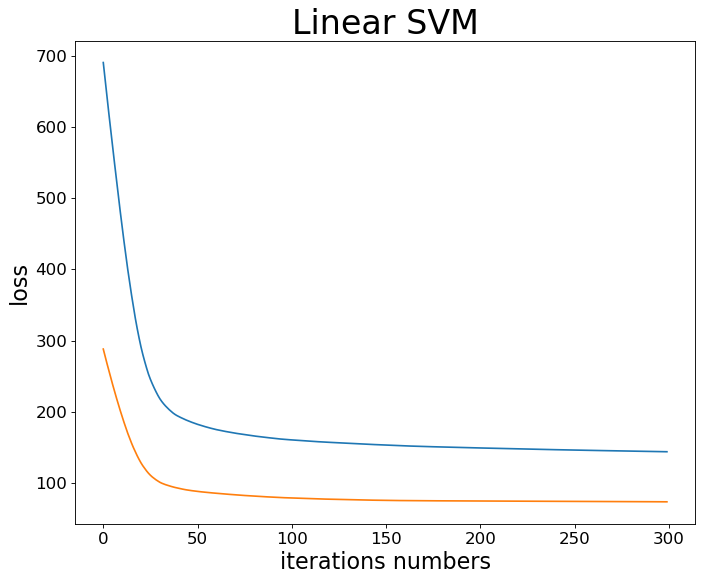

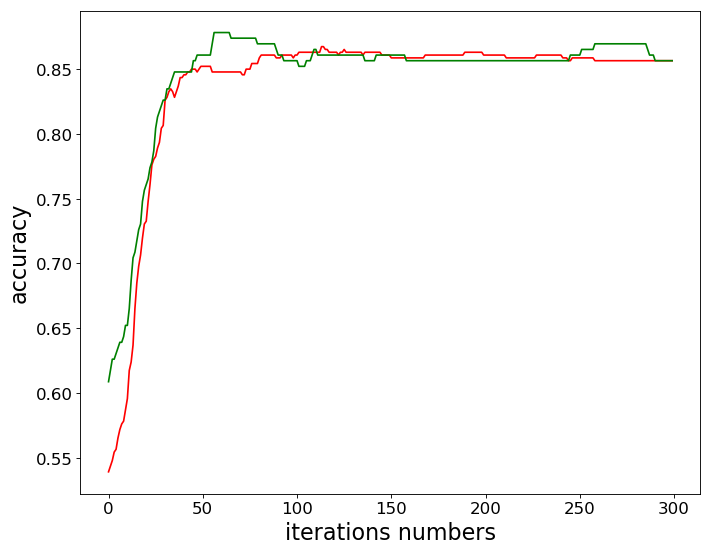

In [70]:
# 定义全局变量
#数据shape和amount相关全局变量
amountOfData = 0 

rateOfValidation = 1/3

n_features = 0

#迭代次数it_num,惩罚系数C，学习率lr，权值W，
it_num = 3000
C = 1
lr = 0.00001
W = 0 #在优化函数中才能初始化 

#作图x,y相关列表（采用列表方式）
amountOfPoints = 300
quotient = it_num // amountOfPoints 
#主要是为了方便。。。请保证这个it_num能被amountOfPoints整除 
x_it_num = np.arange(amountOfPoints)
y_train_loss = np.linspace(1,20,amountOfPoints)
y_validation_loss = np.linspace(1,20,amountOfPoints)
accuracy_vectort = np.linspace(1,20,amountOfPoints)
accuracy_vectorv = np.linspace(1,20,amountOfPoints)
#主函数部分
#读取数据&分割数据
x_source,y_source = dataLoader('D:/austrilian.txt')
x_train,x_validation,y_train,y_validation = dataSpliter(x_source,y_source)

#进行优化
optimizier(x_train,x_validation,y_train,y_validation)

print(accuracy(x_train,y_train))
print(accuracy(x_validation,y_validation))
#画图
draw()
